In [1]:
import autograd.numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from autograd.numpy.linalg import norm as Norm
from autograd.numpy import transpose as T
from autograd import grad,jacobian
from src.line_search import line_search
from src.plots import show_plot_contour, show_plot_3d
from src.unconstrained_non_linear_optimization import (
    first_order_gradient_descent,
    second_order_gradient_descent,
    marquardt
)

## 1.1 Unconstrained Optimization

**Definition 1.1.1** Consider the problem:

\begin{align}
x^* = argmin_x f(x) \quad (1.1)
\end{align}

where $f$ is a continuously differentiable function and that a minimum $x^*$ exists between the interval $(a,b)$ to satisfy the condition $\triangledown f(x^*)=0$. In most cases, these problems are difficult to solve algebraically and must be processed using numerical estimation involving iterative algorithms that compute sequence of points:
\begin{align}
x_0, x_1, \cdots, x_n, \forall x \in \mathbb{R}^n
\end{align}
with:
\begin{align}
f(x_{j+1}) \lt f(x_j)
\end{align}

The algorithm follows one or more criteria such as $\triangledown f(x_j) \lt \epsilon$ where $\epsilon$ is the predefined convergence value. 


**Definition 1.1.2** ***Strong Minimum*** is $x^*$ along $(a,b)$ where the objective function increases locally in all directions. In other words, the point $x^*$ is a strong minimum of a function $f(x)$ if a scalar $\delta \gt 0$ exists such that $f(x^*) \lt f(x^* + \triangledown x)$ for all $\triangledown x$ such that $0 \lt \Vert{\triangledown x}\Vert \leq \delta$.

**Definition 1.1.3** ***Weak Minimum*** describes a point $x^*$ where the
$f(x)$ remains the same in some directions and increases locally in other directions. That is to say, a point $x^*$ is weak minimum of $f(x)$ if not strong minimum and scalar $\delta > 0$ exists such that $f(x^*) \leq f(x^* + \triangledown x)$ for all $\triangledown x$ such that $0 < \Vert\triangledown x\Vert \leq \delta$.

**Definition 1.1.4** The minimum is a unique global if $\delta=\infty$ otherwise, it is a local minimum.

### First Order Condition
If $f(x)$ has continuous second derivatives, it can be used to approximate nearby points using Taylor Series:

\begin{align}
\quad f(x + \triangledown x) \approx f(x) + \triangledown x^Tg(x) + \frac{1}{2}\triangledown x^TH(x)\triangledown x + \cdots \qquad (1.2)
\end{align}

where:\
$\quad x$: vector of scalars\
$\quad g$: gradient first derivative\
$\quad H$: hessian second derivative\
$\quad x=\left[\array{
        x_1&\\\vdots&\\x_2
    } \right]$\
$\quad g=\bigg(\frac{\partial f}{\partial x}\bigg)^T=\left[\array{\frac{\partial f}{\partial x}&\\\vdots&\\\frac{\partial f}{\partial x_n}} \right]$\
$\quad H=\left[\array{
 \frac{\partial^2f}{\partial x_1^2}&,\cdots&,\frac{\partial^2f}{\partial x_1\partial x_n}&\\
 \cdots&,\ddots&,\cdots&\\
 \frac{\partial^2f}{\partial x_1^2}&,\cdots&,\frac{\partial^2f}{\partial x_n^2}&\\
    }
    \right]$

***First-order condition*** From the first 2 terms of ***Eq.(1.2)***, (assume $\Vert\triangledown x\Vert \ll 1$)
 - Given of ambiguity of sign of the term $\triangledown x^T g(x)$, can only avoid cost decrese $f(x+\triangledown x) < f(x)$ if $g(x^*)=0$\
$\longrightarrow$ obtain further information from higher derivatives
 - $g(x^*)=0$ is a necessary and sufficient condition for a point to be a stationary point, a necessary but not sufficient condition to be a minima.
 - Stationary point can be a maximum o saddle point.
 
Additional conditions can be derived from the Taylor series expansion, we set $g(x^*)=0$, in which case:\
\begin{align}
f(x^* + \triangledown x) \approx f(x^*) + \frac{1}{2}\triangledown x^TH(x^*)\triangledown x + \cdots
\end{align}
 - For a strong Minimum, need $\triangledown x^T H(x^*)\triangledown x > 0 \quad \forall \triangledown x$\
 which is sufficient to ensure that $f(x^* + \triangledown x) > f(x^*)$
 - To be true for arbitrary $\triangledown x \ne 0$, sufficient condition is that $H(x^*) \gt 0$, positive definite.

***Second-order necessary condition*** for a strong minimum is $H(x^*) \geq 0 (PSD)$, because in this case the higher order terms in the expansion can play an important role, i.e:\
$\quad \triangledown x^TH(x^*)\triangledown x = 0$\
but the third term in Taylor expansion is positive.

Require $g(x^*)=0$ and $H(x^*) \gt 0$ (sufficient) or $H(x^*) \geq 0$ (necessary)

**Example 1.1.1** Consider the function $\arg\min_{(x_1,x_1)}f(x)= \big[x_1 - x_2 + 2x_1x_2 + 2x_1^2 + x_2^2 \big]$,\
$\Box$ Find the minimizer $x^*$

**Solution**\
***First iteration***:

$\triangledown f(x)= \left[\begin{array}{c}
\frac{\partial f}{\partial x_1}&\\
\frac{\partial f}{\partial x_2}&
\end{array}\right]=\left[\begin{array}{c}
1 + 2x_2 + 4x_1&\\
-1 + 2x_1 + 2x_2&
\end{array}\right]$

Starting from $x_0=\left[\begin{array}{c}0&\\0&\end{array}\right]$ gives $-\triangledown f(x_0)=\left[\begin{array}{c}
1 + 2(0) + 4(0)&\\
-1 + 2(0) + 2(0)&
\end{array}\right]=\left[\begin{array}{c}-1&\\1& \end{array}\right]$

Then we have $f\big(x_0 - \alpha \triangledown f(x_0)\big) = f(-\alpha, \alpha)=a^2 - 2\alpha$

Taking partial derivative with respect to $\alpha$ ase set it to zero to find the minimizer $\alpha_0=1$.

Therefore $x_1=\left[\begin{array}{c}0&\\0& \end{array}\right] + \alpha_0 \left[\begin{array}{c}-1&\\1& \end{array}\right] = \left[\begin{array}{c}-1&\\1& \end{array}\right]$

***Second iteration***:

Given $x_1 = \left[\begin{array}{c}-1\\1\end{array}\right]$,
we have $-\triangledown f(x_1)= \left[\begin{array}{c}1\\1\end{array}\right]$

Then from $\underset{\alpha}{\arg\min}f\big(x_1 - \alpha\triangledown f(x_1)\big)=5\alpha^2 - 2\alpha -1$,
finding the minimizer $\alpha_1 = 0.2$

Hence, $x_2=\left[\begin{array}{c}-1\\1\end{array}\right] + \alpha \left[\begin{array}{c}1\\1\end{array}\right] = \left[\begin{array}{c}-0.8\\1.2\end{array}\right]$

### 1.2 Solution Method - Line Search
Minimization problems are solved using iterative algorithms given an initial estimate of the minimizer $x^*$ and a search direction $\delta$, hence we have the solution form as:

\begin{align}
x_{j+1} = x_j + \beta_j\delta_j, \text{ for some scalar } \beta_j \ne 0  
\end{align}

### 1.2.1 Search Directon, $\delta$
Defines a slice through the solution space that specifically combines with the step size $\alpha$ to arrive at the proper minimizer $x^*$. This ensures that $f$ decreases moving from $x_j$ to $j_{j+1}$ and is usually relate to the gradient $\triangledown f(x_j)$. The most obvious direction is the $-\triangledown f_j$ since it will decrease $f_j$ most rapidly. This can be verified using Taylor's Theorem:

\begin{align}
f(x_j + \beta) = f(x_j) + \beta \delta^T \triangledown f(x_j) + \frac{1}{2}\beta^2 \delta^T f(x_j+\beta\delta)\delta, \text{ where } t \in (0, \beta)
\end{align}

The rate of change in $f$ along the direction of $\delta$ and $x_j$ is the coefficient $\beta$.

Therefore, the unit direction $\delta$ of most rapid decrease is the solution to:

\begin{align}
\min \delta^T\triangledown f_j, \quad \text{ s.t. } \Vert \delta \Vert = 1
\end{align}

The default direction of the line search is using **steepest descent or Cauchy Direction**:

\begin{align}
\delta = -\frac{\triangledown f_j}{\Vert \triangledown f_j \Vert}
\end{align}

This must be orthogonal to the countours of the function $f_j$.

Alternatively, we can also use the **Newton Direction**:

\begin{align}
\delta = -\triangledown^2 f(x)^{-1}\triangledown f(x)
\end{align}

or the **Newton-Like Direction**

\begin{align}
\delta = -\mathbb{H} \triangledown f(x)
\end{align}

where:

$\quad \mathbb{H} \in \mathbb{R}^{nxn}$ is symmetric and constructed to approximate the inverse of $\triangledown^2 f(x)$

The update to $x_j$ is calculated as: 
\begin{align}
x_{j+1} = x_j + \beta^*\delta
\end{align}

If $\triangledown f(x_j) \ne 0$, then a direction of ***strict descent*** must exist and should satisfy:

\begin{align}
\triangledown f(x+\beta\delta) \lt 0
\end{align}


### 1.2.2 Step Size, $\beta$

The step size is a non-negative value such that $f(x_j + \beta_j\delta_j) \lt f(x_j)$. When choosing step size using line-search, there is a tradeoff between substantial reduction of f_k and not spending too much time finding the solution. If $\beta_j$ is too big, it is prone to overshoot while too small value will consume more time finding the convergent value.

A stable line search should be globally convergent, that is the gradient norms $\Vert \triangledown f(x_j) \Vert$ should converge to 0 with each iteration, in other words:

\begin{align}
\lim_{k\rightarrow \infty} \Vert\triangledown f(x_j) \Vert = 0
\end{align}

The performance of the line search algorithm depends on the selection of both the step length $\beta_j$ and the descent direction $\delta_j$. The condition for selecting the direction $\delta_j$ for the next iterate is:

\begin{align}
\triangledown^T f(x_{j-1})\delta_j \lt 0
\end{align}

In other words, the directional derivative on the direction $\delta_k$ must be negative. The step length $\beta_k$ is computed by the one dimensional optimization problem formulated as:

\begin{align}
\min_{\beta \lt 0} f(\beta_j) = \min_{\beta \lt 0} f(x_{j-1} + \beta_j\delta_j)
\end{align}

In finding the correct step size $\beta$ at the $j^{th}$ iteration, we should keep in mind that it must yield  an acceptable reduction in the value of the $f(x)$. Thus, we solve a minimization task for:

\begin{align}
f(\beta) = f(x_{j-1} + \beta\delta_j), \beta > 0
\end{align}

The algorithm must be designed to avoid too many calculations of $f(x)$ and its gradient. This can be achieved by performing inexact line search to compute the local minimizer of $f(x)$. The condition of choosing $\beta$ at each iterated:

\begin{align}
f(x_j)=f(x_j + \beta_j, \delta_j)
\end{align}

is not enough and there must be a sufficient decrease condition called ***Wolfe Conditions***.



## 1.2.3 The Wolfe Conditions
The step size $\beta_j$, chosen at each iteration j, must result in a sufficient decrease in objective function $f(x)$ given by

\begin{align}
f(x_{j-1} + \beta_j\delta_j) \leq f(x_j) + c_1\beta_k\triangledown^T f(x_j)\delta_j, c_1 \in (0,1) \qquad(1)
\end{align}

This is also called the Armijo or Armijo-Goldstein Condition. Practically, the value of $c_1$ should be very small, for example in the range of $10^{-3}$ and $10^{-4}$. But the Armijo condition itself is not enough to guarantee a reasonable progress in the algorithm. To avoid unacceptably short step lengths, there is another condition:

\begin{align}
\triangledown^Tf(x_{j-1} + \beta_j\delta_j)\delta_k \geq c_2\triangledown^T f(x_{j-1}\delta_k, c_2 \in (c_1, 1) \qquad (2)
\end{align}

This is also called the curvature condition, practically $c_2$ is chosen beteen 0.1 - 0.9 depending on the algorithms we consider Eq.1 and Eq.2 together form the Wolfe Conditions. Further more, the curvature condition can be modified to steer away from cases where the step length might satisfy the Wolfe conditions without being close to the minimizer $f(\beta^*)$. The modified vertion of Eq.(2) can be rewritten as:

\begin{align}
\left|\triangledown^T f(x_{j-1} + \beta_k\delta_k)\delta_j\right| \leq c_2|\triangledown^Tf(x_{j-1})\delta_j| \qquad(3)
\end{align}

**Eq.(1)** and **Eq.(2)** form the Strong Wolfe Conditions. The term $\triangledown^T f(x_{j-1} + \beta_j\delta_j)\delta_j$ is no longer too positive, unlike the case of Wolfe conditions.

A peripheral algorithm ***zoom*** serves as an inner loop and takes two values $\beta_{l}$ and $\beta_{r}$ that bounds the interval $[\beta_{low}, \beta_{high}]$ containing the step lenght that satisfies the Strong Wolfe Conditions. The purpose is to generate an iterate $\beta_j \in [\beta_l, \beta_r]$ at each step and replaces $\beta_{low}$ or $\beta_{high}$ with $\beta_j$ while satisfying the following conditions:

### 1.2.3.1 Wolfe First Condition - Armijo Rule
The first search criteria is based on the sufficient decrease condition and is formulateda as:

\begin{align}
f(x + \beta\delta) <= f(x) + c_1\beta\triangledown^Tf(x)
\end{align}

Where $c_1$ is a small constant value in the range of $10^{-3}$ and $10^{-4}$.

The line search work by selecting an initial step length $\beta \geq 0$ and reducing the step by a constant factor $\tau < 1$ which is typically set to $\frac{1}{2}$. At the $j^{th}$ step , the step size will be:

\begin{align}
\beta_j = \tau^{j-1}\beta_1
\end{align}

Alternative methods to line search to determine the step size are ***quadratic*** or ***cubic*** interpolations.


### 1.2.3.2 Wolfe Second Condition - Curvature Rule
The second criteria for a Strong Wolfe is the curvature condition described as:

\begin{align}
\big|f(x + \beta\delta)| \leq c_2|\triangledown^Tf(x)\big|
\end{align}

**Step 1**. Find the initial interval which contains the point that satisfies the Strong Wolfe condition.

**Step 2**. Zoom into the bracketed interval and find the point $\beta_j$.

The **Step 1** expands the max step size and tests these two criterias then returns the step length.

The **Step 2** uses two values of $\beta_{lo}$ and $\beta_{hi}$ so that $f(\beta_{lo})$ is the lowest value of $f(x)$ that satisfies the sufficient decrease condition and the interval satisfies the condition $f(\beta_{lo})(\beta_{hi} - \beta_{lo}) \lt 0$. These conditions ensure the interval contains the step that will satisfy the Strong Wolfe Condition.

The **zoom** function works by searching $\beta_j \in [\beta_{low}, \beta_{high}]$. If $\beta_j$ violates the strong Wolfe conditions or $f(\beta_j) \geq f(\beta_{low})$, then $\beta_j$ becomes the new $\beta_{high}$.

If the sufficient decrease condition is met by $\beta_j$, then curvature condition is checked and terminates if satisfied, otherwise $\beta_j$ must be lower than $\beta_low$ and satisfies the decrease condition, so $\beta_j$ becomes the new $\beta_{low}$. The new $\beta_{high}$ is selected to satisfy the criteria:

\begin{align}
\triangledown f(\beta_{low})(\beta_{high} - \beta_{low}) \lt 0
\end{align}

An interval of $[0, \beta]$ will contain a step length $\beta_j$ that satisfies the Strong Wolfe Condition if:

**(1)** The sufficient decrease condition are violated at point $\beta$

**(2)** The sufficient decrease is satisfied at $\beta$ and the slope the function satisfies $\triangledown f(\beta) > 0$

$\underline{\overline{\textbf{Algorithm: zoom}}}$\
$\textbf{Inputs:}\\\
\begin{array}\\
\quad f& \text{objective function}\\
\quad x& \text{function parameters where } x \in \mathbb{R}^n\\
\quad \beta_{low}& \text{step size lower limit}\\
\quad \beta_{high}& \text{step size upper limit}\\
\quad c_{1}& \text{Armijo rule constant}\\
\quad c_{2}& \text{curvature rule constant}\\
\end{array}$
$\tau \leftarrow \frac{1}{2}$\
$\delta \leftarrow -\frac{\triangledown f(x)}{\Vert\triangledown f(x)\Vert}$\
$\textbf{while True} \textbf{ do}$\
|$\quad \beta_j \leftarrow \tau(\beta_{high} - \beta_{low})$\
|$\quad \textbf{if } f(x+\beta_j\delta) > f(x) + c_1\beta_j\triangledown^Tf(x)\delta \textbf{ or } f(x+\beta_j\delta) \geq f(x + \beta_{low} \delta) \textbf{ do}$\
|$\quad|\quad \beta_{high} \leftarrow \beta_j$\
|$\quad \textbf{else} $\
|$\quad|\quad \textbf{if } \big|\triangledown^Tf(x+\beta_j\delta)\delta\big| \leq c_2\triangledown^Tf(x)\delta \textbf{ do}$\
|$\quad|\quad$|$\quad \beta^* \leftarrow \beta_j $\
|$\quad|\quad$|$\quad \textbf{break}$\
|$\quad|\quad \textbf{endif }$\
|$\quad|\quad \textbf{if } (\beta_{high}-\beta_{low})\big[\triangledown^Tf(x+\beta_{low}\delta)\delta\big] \geq 0.0 \textbf{ do}$\
|$\quad|\quad \quad \beta_{high} \leftarrow \beta_{low} $\
|$\quad|\quad \textbf{endif }$\
|$\quad \textbf{endif}$\
$\textbf{end while}$\
$\textbf{return } \beta^*$

$\underline{\overline{\text{Algorithm: Line Search}}}$\
$\text{Inputs:}\\\
\begin{array}\\
\quad f& \text{objective function}\\
\quad x& \text{function parameters}\\
\quad \beta_{low}& \text{step size lower limit }\\
\quad \beta_{high}& \text{step size higher limit}\\
\quad c_1& \text{Armijo rule constant}\\
\quad c_2& \text{Curvature rule constant}\\
\quad \epsilon& \text{convergence criteria}\\
\end{array}$\
$\tau \leftarrow \frac{1}{2}$\
$\beta_{max} \leftarrow \beta_{high}$\
$\beta_{prev} \leftarrow \beta_{low}$\
$\delta \leftarrow -\frac{\triangledown^Tf(x)}{\Vert \triangledown^Tf(x)\Vert}$\
$\textbf{while True do}$\
|$\quad \beta_j \leftarrow \tau(\beta_{high}-\beta_{low})$\
|$\quad \textbf{if } f(x+\beta_j\delta) > f(x) + c_1\beta_j\triangledown^Tf(x)\delta \textbf{ or } f(x+\beta_j\delta) \geq f(x + \beta_{prev} \delta) \textbf{ do}$\
|$\quad$|$\quad \beta^* \leftarrow zoom(\cdots)$\
|$\quad$|$\quad \text{ break}$\
|$\quad \textbf{end if}$\
|$\quad \textbf{if } |\triangledown^Tf(x+\beta_j\delta)\delta| \leq c_2\triangledown^Tf(x)\delta \textbf{ do}$\
|$\quad$|$\quad \beta^* \leftarrow zoom(\cdots)$\
|$\quad$|$\quad \text{ break}$\
|$\quad \textbf{end if}$\
|$\quad \textbf{if } \triangledown^Tf(x+\beta_{low}\delta)\delta \gt 0 \textbf{ do}$\
|$\quad$|$\quad \beta^* \leftarrow zoom(\cdots)$\
|$\quad$|$\quad \text{ break}$\
|$\quad \textbf{end if}$\
|$\quad \beta^* \leftarrow \beta_j$\
|$\quad \textbf{if } |\beta_j-\beta_{prev}|< \epsilon \textbf{ do}$\
|$\quad|\quad \textbf{break}$\
|$\quad \textbf{endif}$\
|$\quad \beta_{prev} \leftarrow \beta_j$\
$\textbf{end while}$\
$\textbf{return } \beta^*$

**Example 1.2.1** Consider again the function $f(x)= x_1 - x_2 + 2x_1x_2 + 2x_1^2 + x_2^2$,\
$\Box$ Find the suitable step $\beta$ for gradient descent solution starting at $[-1,-1]$.

In [2]:
# Objective functions
#f = lambda x: x[0] - x[1] + 2*x[0]*x[1] + 2*x[0]**2 + x[1]**2
f = lambda x: x[0]**2 + x[1]**2
#f = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2

# Initial function parameters
x = np.array([-1., -1.], dtype=float)

# Setup gradient and directional descent
gf = grad(f)
delta = -gf(x)/Norm(gf(x))

# Calculate gradient step size
beta = line_search(f, x, beta_l=0, beta_h=1, verbose=False)
print(f"Custom implementation beta:{beta:.6f} f(x):{f(x)} < f(x+beta*delta):{f(x + beta*delta):.6f}")
assert f(x) > f(x + beta*delta)

# Calculate gradient step size using scipy's line_search implementation
beta_exp = sp.optimize.line_search(f, myfprime=gf, xk=x, pk=-gf(x)/Norm(gf(x)))[0]
print(f"Scipy implementation beta:{beta_exp:.6f} f(x):{f(x)} < f(x+beta*delta):{f(x + beta_exp*delta):.6f}")
assert f(x) > f(x + beta*delta)

Custom implementation beta:0.999999 f(x):2.0 < f(x+beta*delta):0.171574
Scipy implementation beta:1.000000 f(x):2.0 < f(x+beta*delta):0.171573


## [1.3 First Order Line Search Gradient Descent](https://indrag49.github.io/Numerical-Optimization/line-search-descent-methods.html#first-order-line-search-gradient-descent-method-the-steepest-descent-algorithm)

### Steepest Descent Algorithm
OPtimizations that use the gradient vector $\triangledown^T f(x)$ to compute the descent direction $\delta_j$ on each iteration are referred to as first order line search gradient descent methods and is also known as Cauchy Method.

To select the  direction $\delta_j$ of the steepest descent algorithm, the direction given by the unit vector $\delta_j$ is chosen such that directional derivative $\triangledown^Tf(x_{j-1})\delta_j$ takes a minimum value for all possible valuied of $\delta_j$ at $x_{\delta-1}$. Now using Schwartz's inequality:

\begin{align}
\triangledown^Tf\big(x_{j-1}\big)p_k \geq -\Vert \triangledown^Tf\big(x_{j-1}\big) \Vert \delta_j \Vert \geq -\Vert \triangledown^Tf\big(x_{j-1}\big) \Vert
\end{align}

The expression $-\Vert \triangledown^Tf\big(x_{j-1}\big) \Vert$ is the minimum value, from the first and third term, we can write:

\begin{align}
\delta_j = -\frac{\triangledown f(x_{j-1})}{\Vert \triangledown f(x_{j-1})\Vert}
\end{align}

This expression is the normalized direction of the steepest descent algorithm presented as:

$\underline{\overline{\textbf{Algorithm: First Order Gradient Descent Method}}}$\
$\textbf{Inputs:}\\\
\array{
f(x)&\text{objective function}\\
x_a&\text{initial values}\\
\epsilon_1& \text{minimum distance between x_j and x_j+1}\\
\epsilon_2& \text{minimum norm value for the gradient}\\
\epsilon_3& \text{distance between f(x) and f(x_next)}\\
\alpha_1& \text{parameter for Armijo condition rule}\\
\alpha_2& \text{parameter for curvature condition rule}\\
}$\
$gf \leftarrow f'(x)$\
$x_j \leftarrow x_a$\
$\textbf{while True do}$\
|$\quad \delta_j \leftarrow - \frac{gf(x_j)}{\Vert gf(x_j) \Vert}$\
|$\quad \beta_j \leftarrow \textit{line_search}(\cdots)$\
|$\quad x_{j+1} \leftarrow x_j + \beta_j\delta_j$\
|$\quad\textbf{if } \Vert x_{j+1}-x_j\Vert \lt \epsilon_1\text{ or } \Vert g(x)\Vert \lt \epsilon_2 \text{ or } |f(x)-f(x)| \lt \epsilon_3 \textbf{ do}$\
|$\quad$|$\quad$ $x^* \leftarrow x_{j+1}$\
|$\quad$|$\quad$ $\textbf{ break}$\
|$\quad \textbf{ else}$\
|$\quad$|$\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad \textbf{ end if}$\
$\textbf{end while}$\
$\textbf{return }$ $x^*, f(x^*)$

**Example 1.3.1** Consider [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function) as the objective function:

$f(x1,x2) = (x1^2 + x2 - 11)^2 + (x1 + x2^2 -7)^2$

The function has 4 local minima:\
$\bf{f(3.0, 2.0)=0}$\
$f(-2.8051, 3.1313)=0$\
$f(-3.7792, -3.2831)=0$\
$f(3.5844, -1.8481)=0$

and 1 maximum:\
$f(-2.270845, -0.923039)=0$

$\Box$ Find one of the minimums with initial value of $[-2.5,-1]$

Number of steps: 12
x*=[3.00003242 2.00013692] f(x*)=0.000000


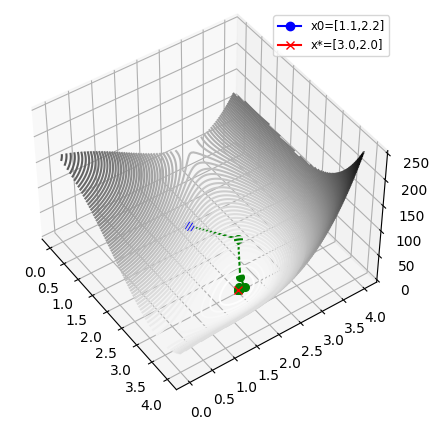

In [3]:
# Objective function
f = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Initial values of x^n
x_a = np.array([1.1, 2.2])

# Gradient descent stop parameter
tol_1, tol_2, tol_3 = 10**-5, 10**-5, 10**-5
c_1, c_2 = 10*-4, 0.9

# Run gradient descent
ret = first_order_gradient_descent(f, x_a, tol_1, tol_2, tol_3, c_1, c_2, verbose=False)

# Get gradient descent path
path = np.array(ret[2])

print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

#show_plot_contour(f, path, domain=[0,4], samples=100)

show_plot_3d(f, path, domain=[0,4], samples=100)

**Example 1.3.2** Consider $f(x_1,x_2)=x_1^2 + x_1x_2 + x_2^2$ and initial values of $x=\left[\array{-1.1\\2.2}\right]$, find $x^*$.

Number of steps: 11
x*=[ 0.00073645 -0.0010497 ] f(x*)=0.000001


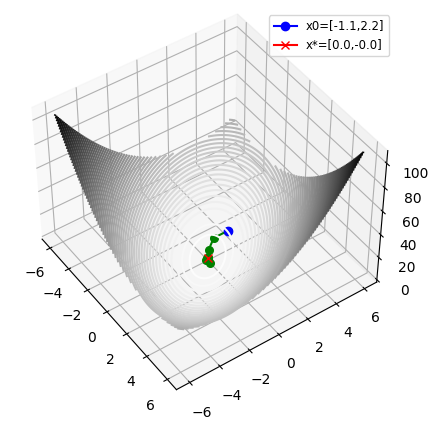

In [4]:
# Objective function
f = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2

# Initial values of x^n
x_a = np.array([-1.1, 2.2])

# Gradient descent stop parameter
tol_1, tol_2, tol_3 = 10**-5, 10**-5, 10**-5
#alpha_1, alpha_2 = 10*-4, 0.212
alpha_1, alpha_2 = 10*-4, 0.9

# Run gradient descent
ret = first_order_gradient_descent(f, x_a, tol_1, tol_2, tol_3, alpha_1, alpha_2, verbose=False)

# Get gradient descent path
path = np.array(ret[2])

print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

# Show the steepest descent path on a 2d plane
#show_plot_contour(f, path)

# Show the steepest descent path along the curve surface
show_plot_3d(f, path)

## 1.4 Second Order Line Search Gradient Descent
The Hessian of the objective function having the form $\mathbb{H}f(x)$ will be used to compute the line search.

\begin{align}
\delta = -[\mathbb{H}f]^{-1}(x) \triangledown f(x) \qquad (1.4.1)
\end{align}

So far the above equation is for single variable non-linear objective function, for multivariate we refer to:

\begin{align}
x_j = x_{j-1} - [\mathbb{H}f]^{-1}(x_{j-1})\triangledown f(x_{j-1}), \quad j=1,2,3,\cdots \qquad (1.4.2)
\end{align}

This is used for solving the problem $\triangledown f(x)=0$ iteratively, given the starting value $x_0$. The Newton's method follows quadratic convergence, but is not always guaranteed even from an iterate close to the minimizer, since the ***Hessian*** given by $\mathbb{H}f(x)$ may not always be positive definite. To overcome this problem, the search given by Eq.(1.4.1) is instead used as a descent direction if the ***line search descent direction***. Thus, for the $j^{th}$ step, the descent direction is given by:

\begin{align}
\delta_j = -[\mathbb{H}f]^{-1}(x_{j-1}) \triangledown f(x_{j-1}) \qquad (1.4.3)
\end{align}

Finally, the step length $\beta_j$ is selected after solving the one dimensional optimization task given by

\begin{align}
\min_{\beta_j \gt 0} f(\beta_j) = min_{\beta_j>0} f(x_{j-1} + \beta_j\delta_j)
\end{align}

The algorithm describing the modified version  of Newton's Method is shown as:

$\underline{\overline{\textbf{Algorithm: Second Order Line Search Modified Newton's Method}}}$\
$\textbf{Inputs:}\\\
\array{
f(x) &\text{objective function}\\
x_a &\text{initial values}\\
\epsilon_1 &\text{minimum distance between x_j and x_j+1}\\
\epsilon_2 &\text{minimum norm value for the gradient}\\
\epsilon_3 &\text{distance between f(x) and f(x_next)}\\
\alpha_1 &\text{parameter for Armijo condition rule}\\
\alpha_2 &\text{parameter for curvature condition rule}\\
}$\
$g \leftarrow f'(x)$\
$\mathbb{H} \leftarrow \mathbb{H}f(x)$\
$x_j \leftarrow x_a$\
$\textbf{while True do}$\
|$\quad \delta_j \leftarrow - [\mathbb{H}f]^{-1}(x_j)\triangledown f(x_j)$\
|$\quad \beta_j \leftarrow \text{line_search}(\cdots)$\
|$\quad x_{j+1} \leftarrow x_j + \beta_j\delta_j$\
|$\quad\textbf{if } \Vert x_{j+1}-x_j\Vert \text{ and } \Vert g(x)\Vert \lt \epsilon_2 \text{ or } |f(x)-f(x)| \lt \epsilon_3 \textbf{ do}$\
|$\quad$|$\quad$ $x^* \leftarrow x_{j+1}$\
|$\quad$|$\quad$ $\textbf{ break}$\
|$\quad \textbf{ else}$\
|$\quad$|$\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad \textbf{ end if}$\
$\textbf{end while}$\
$\textbf{return }$ $x^*, f(x^*)$
 

**Example 1.4.1** Consider the Beale's function which is multimodal with sharp peaks at the corners of the input domain of [-4.5, 4.5]

$f(x_1,x_2)=(1.5 - x_1(1-x_2))^2 + (2.25 - x_1(1-x_2^2))^2 + (2.625-x_1(1-x_2^3))^2 $\

The function has one global minimizer at $f(3, 0.5)=0$.

Use the following constants:\
$\Box$ Initial values at $x_j=\left[\array{1.8\\0.8}\right]$ and use the Modified Newton's Method to find the expected minimizer.\
$\Box$ $\epsilon_1=\epsilon_2=\epsilon_3=10^{-5}$\
$\Box$ Constants for the step length using strong Wolfe conditions to be $\alpha_1=10^{-4}$ and $\alpha_2=0.25$

Number of steps: 11
x*=[2.99987271 0.49997574] f(x*)=0.000000


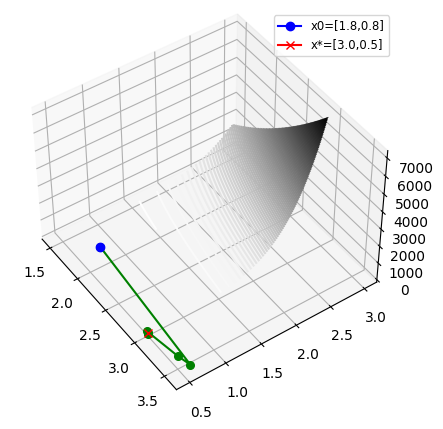

In [5]:
f = lambda x: (1.5 - x[0]*(1 - x[1]))**2 + (2.25 - x[0]*(1 - x[1]**2))**2 + (2.625 - x[0]*(1 - x[1]**3))**2
#f = lambda x: (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
eps_1 = 10**-5
eps_2 = 10**-5
eps_3 = 10**-5
c_1 = 10**-4
c_2 = 0.9
x_a = np.array([1.8, 0.8], dtype=float)
ret = second_order_gradient_descent(
    f=f, x_a=x_a, eps_1=eps_1, eps_2=eps_2, eps_3=eps_3,
    alpha_1=c_1, alpha_2=c_2, verbose=False
)
print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

# Get gradient descent path
path = np.array(ret[2])
# Show the steepest descent path on a 2d plane
#show_plot_contour(f, path)
# Show the steepest descent path along the curve surface
show_plot_3d(f, path, domain=[1.5,3])

## 1.5 Marquardt Method
This method is a combination of the steepest descent and Newton's Method in which the diagonal elements of the Hessian Matrix is midified on each step:

\begin{align}
[\mathbb{H}f(x_j)]' = [\mathbb{H}f(x_j)] + \gamma\mathbb{I}
\end{align}

where $\gamma$ is a sufficiently large positive constant that guarantees the positive definiteness of $[\mathbb{H}f(x_j)]'$ when $[\mathbb{H}f(x_j)]$ is not, and $\mathbb{I}$ is the identity matrix.

The descent direction is determined by:

\begin{align}
\delta_j = -[\mathbb{H}f(x_j)]'\triangledown f(x_j)
\end{align}



$\underline{\overline{\textbf{Algorithm: Marquadt Method}}}$\
$\textbf{Inputs:}\\\
\array{
f(x) &\text{objective function}\\
x_a &\text{initial values}\\
\epsilon_1 &\text{minimum distance between x_j and x_j+1}\\
\epsilon_2 &\text{minimum norm value for the gradient}\\
\epsilon_3 &\text{distance between f(x) and f(x_next)}\\
\alpha_1 &\text{parameter for Armijo condition rule}\\
\alpha_2 &\text{parameter for curvature condition rule}\\
\gamma &\text{factor to guarantee positive definite}\\
}$\
$x_j \leftarrow x_a$\
$\textbf{while True do}$\
|$\quad \mathbb{H}' \leftarrow \mathbb{H}f(x_j)+\gamma\mathbb{I}$\
|$\quad \delta_j \leftarrow - [\mathbb{H}f]'^{-1}(x_j)\triangledown f(x_j)$\
|$\quad \beta_j \leftarrow \textit{line_search}(\cdots)$\
|$\quad x_{j+1} \leftarrow x_j + \beta_j\delta_j$\
|$\quad\textbf{if } \Vert x_{j+1}-x_j\Vert \text{ and } \Vert g(x)\Vert \lt \epsilon_2 \text{ or } |f(x)-f(x)| \lt \epsilon_3 \textbf{ do}$\
|$\quad$|$\quad$ $x^* \leftarrow x_{j+1}$\
|$\quad$|$\quad$ $\textbf{ break}$\
|$\quad \textbf{ else}$\
|$\quad$|$\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad \textbf{ end if}$\
$\textbf{end while}$\
$\textbf{return }$ $x^*, f(x^*)$

**Example 1.5.1** Consider again the [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function) as the objective function:

$f(x1,x2) = (x1^2 + x2 - 11)^2 + (x1 + x2^2 -7)^2$

The function has 4 local minima:\
$\bf{f(3.0, 2.0)=0}$\
$f(-2.8051, 3.1313)=0$\
$f(-3.7792, -3.2831)=0$\
$f(3.5844, -1.8481)=0$

and 1 maximum:\
$f(-2.270845, -0.923039)=0$

$\Box$ Find one of the minimums with initial value of $[-2.5,-1]$

Number of steps: 51
x*=[0, 0] f(x*)=170.000000


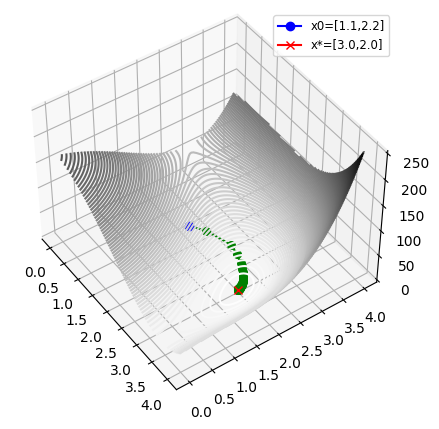

In [6]:
# Objective function
f = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Initial values of x^n
x_a = np.array([1.1, 2.2])

# Gradient descent stop parameter
tol_1, tol_2, tol_3 = 10**-5, 10**-5, 10**-5
c_1, c_2 = 10*-4, 0.9

gamma = 10**3

# Run gradient descent
ret = marquardt(f, x_a, tol_1, tol_2, tol_3, c_1, c_2, gamma=gamma, verbose=False)

# Get gradient descent path
path = np.array(ret[2])

print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

#show_plot_contour(f, path, domain=[0,4], samples=100)

show_plot_3d(f, path, domain=[0,4], samples=100)

#### Reference
[1] [Numerical Optimization, Springer, Nocedal & Wright](https://www.amazon.com/Numerical-Optimization-Operations-Financial-Engineering/dp/0387303030)

[2] [Engineering Optimization, Theory & Practice, 2009, S. Rao](https://www.amazon.com/Engineering-Optimization-Practice-Singiresu-Rao/dp/0470183527)

[3] [Wolfe Conditions, wikipedia](https://en.wikipedia.org/wiki/Wolfe_conditions)

[4] [Line Search Method, wikipedia](https://optimization.cbe.cornell.edu/index.php?title=Line_search_methods)

[5] [Line Search Methods, pdf, Washington University](https://sites.math.washington.edu/~burke/crs/408/notes/nlp/line.pdf)